In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor

In [10]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

In [11]:
!wget $data

--2023-10-19 10:32:25--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: 'housing.csv.5'

     0K .......... .......... .......... .......... ..........  3%  574K 2s
    50K .......... .......... .......... .......... ..........  7% 1,22M 2s
   100K .......... .......... .......... .......... .......... 10% 1,17M 1s
   150K .......... .......... .......... .......... .......... 14% 1,17M 1s
   200K .......... .......... .......... .......... .......... 17% 1,17M 1s
   250K .......... .......... .......... .......... .......... 21% 1,20M 1s
   300K .......... .......... .......... .......... .......... 25% 1,16M 1s
   350K .......... .......... 

In [12]:
df = pd.read_csv(data)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
df = df[(df['ocean_proximity'] == 'INLAND') | (df['ocean_proximity'] == '<1H OCEAN')]

In [15]:
df.ocean_proximity.describe()

count         15687
unique            2
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

In [16]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
df = df.fillna(0)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:
df.median_house_value.describe()

count     15687.000000
mean     191943.020017
std      108801.077620
min       14999.000000
25%      111300.000000
50%      166900.000000
75%      241100.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [19]:
df.median_house_value = np.log1p(df.median_house_value)
df.median_house_value.describe()

count    15687.000000
mean        12.010342
std          0.564962
min          9.615805
25%         11.619994
50%         12.025156
75%         12.392971
max         13.122367
Name: median_house_value, dtype: float64

In [20]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-120.25,37.93,13.0,493.0,76.0,196.0,68.0,3.3750,INLAND
1,-118.40,34.00,10.0,1526.0,339.0,705.0,268.0,5.8083,<1H OCEAN
2,-121.67,38.85,46.0,645.0,131.0,410.0,122.0,1.7417,INLAND
3,-118.14,33.88,24.0,3305.0,982.0,2085.0,881.0,2.6641,<1H OCEAN
4,-118.11,33.92,34.0,1414.0,263.0,983.0,264.0,4.1767,<1H OCEAN


In [22]:
dv = DictVectorizer(sparse=True)
dicts_train = df_train.to_dict(orient='records')
dicts_val = df_val.to_dict(orient='records')
dicts_test = df_test.to_dict(orient='records')

In [23]:
X_train = dv.fit_transform(dicts_train)
X_val = dv.fit_transform(dicts_val)
X_test = dv.fit_transform(dicts_test)

Qustion 1

In [24]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [25]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



Question 2

In [26]:
regr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
regr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [28]:
y_pred = regr.predict(X_val)

In [29]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [30]:
rmse(y_val, y_pred)

0.24527740463893766

Question 3

In [41]:
errors = []  

In [42]:
for n in range(10, 101, 10):
    regr = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_val)
    error = rmse(y_val, y_pred)
    print(n, error)
    errors.append(error)

10 0.24527740463893763
20 0.23904061686517195
30 0.23699502678947654
40 0.2355088433070916
50 0.23502147329312892
60 0.234584327071888
70 0.23446619209731495
80 0.23472118653889681
90 0.2345122268683854
100 0.23430800089392884


In [44]:
for n in range(110, 201, 10):
    regr = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_val)
    error = rmse(y_val, y_pred)
    print(n, error)
    errors.append(error)

110 0.2343047277310495
120 0.23413312513122292
130 0.23392074197851684
140 0.23367907192934007
150 0.23360554701472286
160 0.2334522392319948
170 0.23340125154040173
180 0.23357420998973868
190 0.2338138804713158
200 0.23372174449450633


In [45]:
errors

[0.24527740463893763,
 0.23904061686517195,
 0.23699502678947654,
 0.2355088433070916,
 0.23502147329312892,
 0.234584327071888,
 0.23446619209731495,
 0.23472118653889681,
 0.2345122268683854,
 0.23430800089392884,
 0.2343047277310495,
 0.23413312513122292,
 0.23392074197851684,
 0.23367907192934007,
 0.23360554701472286,
 0.2334522392319948,
 0.23340125154040173,
 0.23357420998973868,
 0.2338138804713158,
 0.23372174449450633]

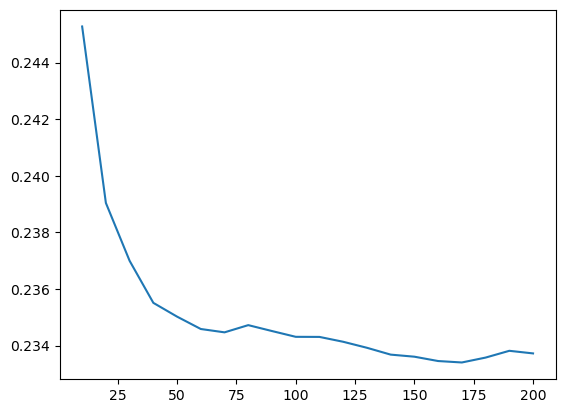

In [49]:
plt.plot(list(range(10, 201, 10)), errors)

Question 4

In [51]:
scores = []
for m in [10, 15, 20, 25]:
    errors = []
    for n in range(10, 201, 10):
        regr = RandomForestRegressor(max_depth=m, n_estimators=n, random_state=1, n_jobs=-1)
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_val)
        error = rmse(y_val, y_pred)
        print(n, error)
        errors.append(error)
    min_error = min(errors)
    print('Min error for max_depth ', m, ': ', min_error)
    scores.append(min_error)

10 0.25067714286966963
20 0.24767192873004387
30 0.2464341141180371
40 0.24516780373109975
50 0.24555736366386038
60 0.24535165259564864
70 0.24540770334945547
80 0.24564007678627323
90 0.24553597121885162
100 0.24544642000029063
110 0.24534370553758386
120 0.24512513704735334
130 0.24485654120695843
140 0.2446346287178102
150 0.24459315934955644
160 0.2445013608898557
170 0.24446036538559984
180 0.2445688226649631
190 0.24477143849125327
200 0.24477302121092492
Min error for max_depth  10 :  0.24446036538559984
10 0.24577217152575975
20 0.23958260550158159
30 0.23772942052310078
40 0.23594829581796592
50 0.23604632017701263
60 0.23573059928218365
70 0.2355221271606145
80 0.23572824807464085
90 0.235437017959416
100 0.23535585187215577
110 0.23515522588984958
120 0.234953076459288
130 0.2348195703606911
140 0.23460949259472658
150 0.2345166705182696
160 0.23431615903636943
170 0.23430771188276833
180 0.2345249318898574
190 0.23474105271367776
200 0.23459581635271426
Min error for max_d

Question 5

In [54]:
regr = RandomForestRegressor(max_depth=20, n_estimators=10, random_state=1, n_jobs=-1)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [55]:
regr.feature_importances_

array([0.0151361 , 0.03031726, 0.10200703, 0.08624381, 0.33561113,
       0.29247297, 0.07380644, 0.02713606, 0.01585222, 0.02141699])

In [73]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

In [74]:
feats = {}
for feature, importance in zip(dv.get_feature_names_out(), regr.feature_importances_):
    feats[feature] = importance
feats    

{'households': 0.01513609844681855,
 'housing_median_age': 0.030317256108796153,
 'latitude': 0.10200703165624685,
 'longitude': 0.08624381391950157,
 'median_income': 0.33561112799548903,
 'ocean_proximity=<1H OCEAN': 0.29247296545343093,
 'ocean_proximity=INLAND': 0.07380644294558006,
 'population': 0.027136059019747173,
 'total_bedrooms': 0.015852218895139155,
 'total_rooms': 0.021416985559250513}

<Axes: >

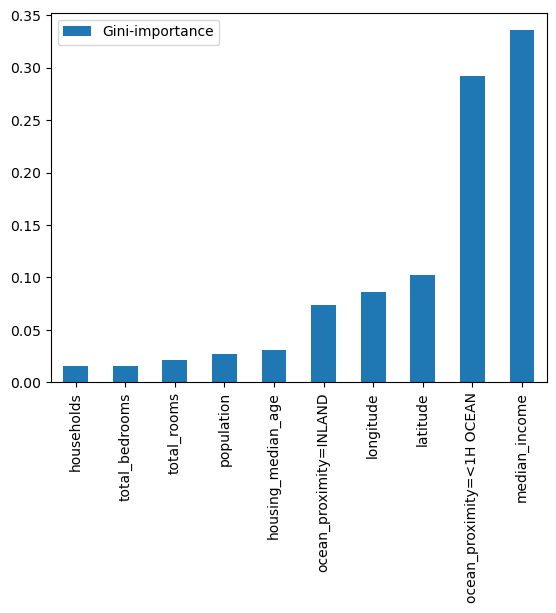

In [77]:
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar')

Question 6

In [79]:
!pip install xgboost

In [82]:
import xgboost as xgb

In [117]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [118]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [119]:
y_pred = model.predict(dval)

In [120]:
rmse(y_val, y_pred)

0.228623199980106

In [121]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [122]:
y_pred = model.predict(dval)

In [123]:
rmse(y_val, y_pred)

0.23208927121609343